# 1. Importing Libraries 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data_loader import load_data


# 2. Loading data & Preprocessing

In [36]:
run_df, incoming_df, metrology_df = load_data('train/')

In [3]:
run_df.rename(columns={'Tool ID': 'ToolId',
                       'Run Start Time': 'RunStartTime',
                       'Run End Time': 'RunEndTime',
                       'Run ID': 'RunId',
                       'Process Step': 'ProcessStep',
                       'Consumable Life': 'ConsumableLife',
                       'Step ID': 'StepId',
                       'Time Stamp': 'TimeStamp',
                       'Sensor Name': 'SensorName',
                       'Sensor Value': 'SensorValue'}, inplace=True)

incoming_df.rename(columns={'Tool ID': 'ToolId', 
                             'Run Start Time': 'RunStartTime',
                             'Run End Time': 'RunEndTime',
                             'Run ID': 'RunId',
                             'Process Step': 'ProcessStep',
                             'Step ID': 'StepId',
                             'Time Stamp': 'TimeStamp',
                             'Sensor Name': 'SensorName',
                             'Sensor Value': 'SensorValue'}, inplace=True)

metrology_df.rename(columns={'Run ID': 'RunId',
                           'Run Start Time': 'RunStartTime', 
                           'Run End Time': 'RunEndTime',   
                           'X_index': 'X_index',
                           'Y_index': 'Y_index',
                           'X': 'X',
                           'Y': 'Y',
                           'Point Index': 'PointIndex',
                           'Measurement': 'Measurement'}, inplace=True)



## Pivot Dataframe

In [ ]:

metrology_pivot = metrology_df.pivot_table(index='RunId',
                                           columns='PointIndex',
                                           values='Measurement')


metrology_pivot.columns = [f'Measurement_{i}' for i in metrology_pivot.columns]

# Spatial feature engineering
coord_map = metrology_df[['PointIndex', 'X', 'Y']].drop_duplicates().set_index('PointIndex')



display(metrology_pivot.head())

target_columns = list(metrology_pivot.columns)


,Measurement_0,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,Measurement_6,Measurement_7,Measurement_8,Measurement_9,...,Measurement_39,Measurement_40,Measurement_41,Measurement_42,Measurement_43,Measurement_44,Measurement_45,Measurement_46,Measurement_47,Measurement_48
RunId,,,,,,,,,,,,,,,,,,,,,
000f424f-667d-54a2-bbbd-9624c4071465,10.095791,10.156764,10.337179,10.058930,10.116625,10.113654,10.183896,10.190130,10.090914,10.150634,...,10.179591,10.067517,10.129809,10.181777,10.050453,10.164333,10.120488,10.281584,10.171318,10.043010
001466b9-ee4c-5642-8e93-0a501ce4e9d9,10.138968,10.096725,10.350078,10.115794,10.203152,10.204871,10.194956,10.116416,10.086049,10.273882,...,10.263841,10.169717,10.197792,10.287032,10.088166,10.176330,10.222062,10.321888,10.192035,10.103446
002d6c65-b86f-5153-a2d8-206e59da6307,10.104243,10.209842,10.371794,10.099510,10.138044,10.124540,10.279279,10.194900,10.115012,10.166862,...,10.189573,10.086770,10.150102,10.214367,10.087978,10.213599,10.135042,10.301648,10.248628,10.080373
002fdc18-a36b-5188-a5e3-9e1d59697a6b,10.079414,10.196047,10.410978,10.030844,10.104684,10.197017,10.241707,10.085138,10.106157,10.165022,...,10.206083,10.107271,10.170462,10.158340,10.052357,10.198981,10.107771,10.314725,10.208511,10.037665
004379ac-3743-5811-bb3b-d1821813b2d2,10.199996,10.216007,10.398699,10.100442,10.214250,10.218284,10.223888,10.219392,10.140936,10.333146,...,10.249334,10.162063,10.262134,10.260722,10.090795,10.248904,10.252442,10.335714,10.229129,10.083445


## Aggregate features

In [ ]:
def create_agg_features(df, group_col='RunId', prefix=''):

    print(f"aggregated features with prefix: {prefix}")

    # Pivot sensor data first: RunId, TimeStamp, Sensor1, Sensor2, ...
    pivot_df = df.pivot_table(index=[group_col, 'TimeStamp'],
                              columns='SensorName',
                              values='SensorValue',
                              aggfunc='mean') 
    pivot_df = pivot_df.reset_index()
    pivot_df.columns.name = None 


    sensor_cols = [col for col in pivot_df.columns if col not in [group_col, 'TimeStamp']]


    agg_funcs = ['mean', 'std', 'min', 'max', 'median', 'skew', 'sum']


    agg_dict = {col: agg_funcs for col in sensor_cols}
    aggregated_features = pivot_df.groupby(group_col).agg(agg_dict)

    # flatten multi-index columns
    aggregated_features.columns = [f'{prefix}{col[0]}_{col[1]}' for col in aggregated_features.columns]

    run_duration = pivot_df.groupby(group_col)['TimeStamp'].max() - pivot_df.groupby(group_col)['TimeStamp'].min()
    aggregated_features[f'{prefix}run_duration'] = run_duration


    return aggregated_features.reset_index() 


features_run = create_agg_features(run_df, prefix='proc_')


features_incoming = pd.DataFrame() 

features_incoming = create_agg_features(incoming_df, prefix='inc_')

cols_to_drop = [c for c in features_incoming.columns if 'ToolId' in c] 
features_incoming = features_incoming.drop(columns=cols_to_drop, errors='ignore')

# Start with static features from run_df (ConsumableLife, ToolId, Recipe)
static_features = run_df[['RunId', 'ToolId', 'ConsumableLife']].drop_duplicates(subset=['RunId'])
if static_features['RunId'].duplicated().any():
     static_features = static_features.groupby('RunId').first() 
else:
     static_features = static_features.set_index('RunId')


# merge
final_features = static_features.join(features_run.set_index('RunId'), on='RunId')
if not features_incoming.empty:
    final_features = final_features.join(features_incoming.set_index('RunId'), on='RunId')



aggregated features with prefix: proc_
aggregated features with prefix: inc_


## Final processing/merging

In [6]:
from sklearn.model_selection import train_test_split
if not isinstance(metrology_pivot.index, pd.RangeIndex):
     metrology_pivot = metrology_pivot.reset_index()

if not isinstance(final_features.index, pd.RangeIndex):
     final_features = final_features.reset_index()

training_data = pd.merge(final_features, metrology_pivot, on='RunId', how='inner')


feature_columns = [col for col in training_data.columns if col not in target_columns and col != 'RunId']
X = training_data[feature_columns].drop('ToolId', axis=1)
y = training_data[target_columns]
run_ids_final = training_data['RunId'] 


X['inc_run_duration'] = X['inc_run_duration'].apply(lambda x: x.total_seconds())
X['proc_run_duration'] = X['proc_run_duration'].apply(lambda x: x.total_seconds())


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)



# 3. Modelling

## Feature Engineering: Extra Trees + KMeans

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature Selection
def extra_trees_feature_selection(X, y, top_k: int = 45):
    model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'features': X.columns,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False).reset_index(drop=True).round(3).head(top_k)
    selected_features = importance_df['features'].values
    return selected_features, importance_df

extra_trees_features, top_k_df = extra_trees_feature_selection(X, y, top_k=45)
additional_features = ['X', 'Y', 'ConsumableLife']
for feature in additional_features:
    if feature in X.columns and feature not in extra_trees_features:
        extra_trees_features = np.append(extra_trees_features, feature)
X_selected = X[extra_trees_features]

# KMeans clustering to add unsupervised learning features
scaler = StandardScaler()
X_et_scaled = scaler.fit_transform(X_selected)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_et_scaled)
cluster_distances = kmeans.transform(X_et_scaled)
cluster_distance_cols = [f'kmeans_dist_{i}' for i in range(n_clusters)]

# Add cluster labels and distances to feature set
X_et_kmeans = X_selected.copy()
X_et_kmeans['kmeans_label'] = cluster_labels
for i, col in enumerate(cluster_distance_cols):
    X_et_kmeans[col] = cluster_distances[:, i]

## Correlation Heatmap

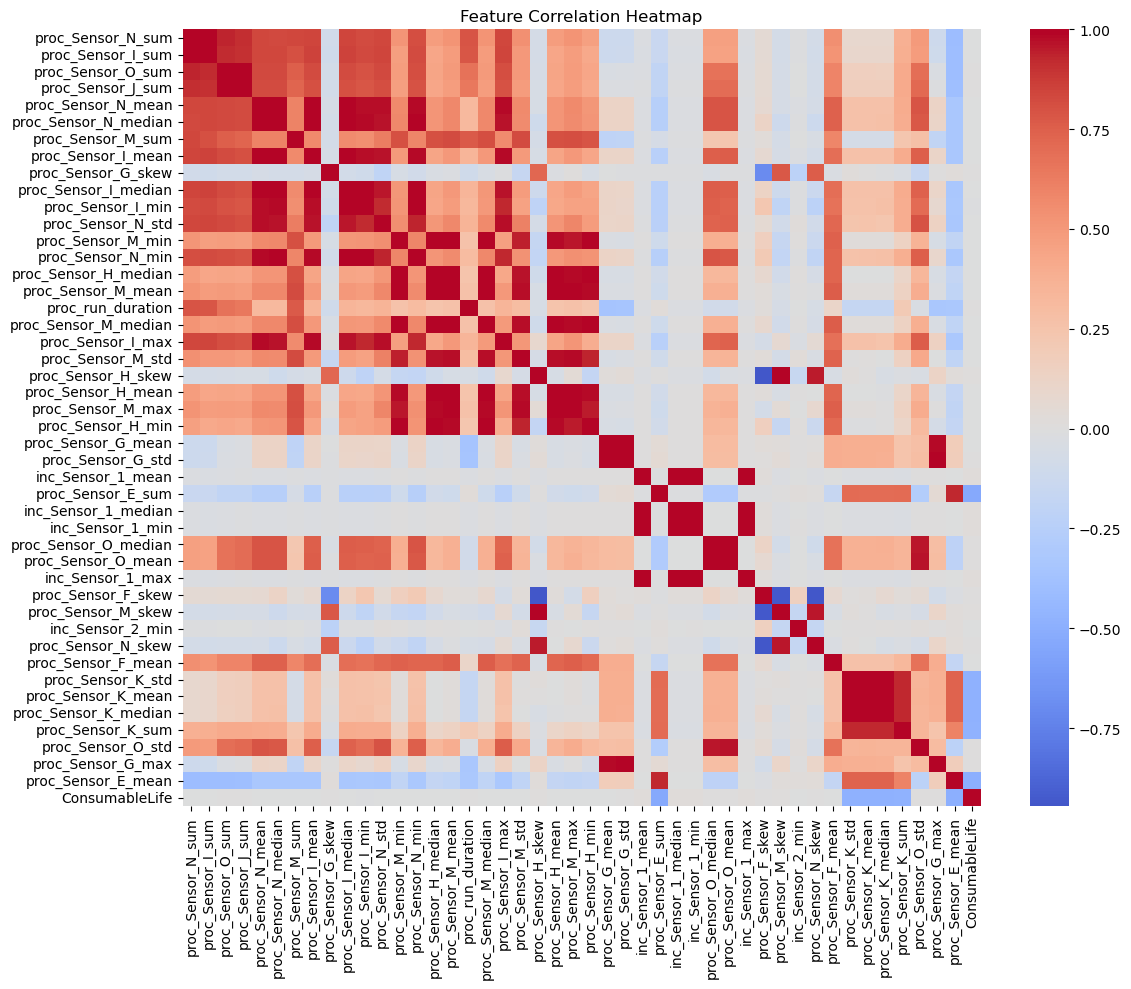

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('plots/correlation_heatmap.png')
plt.show()

## Covariance matrix for top features

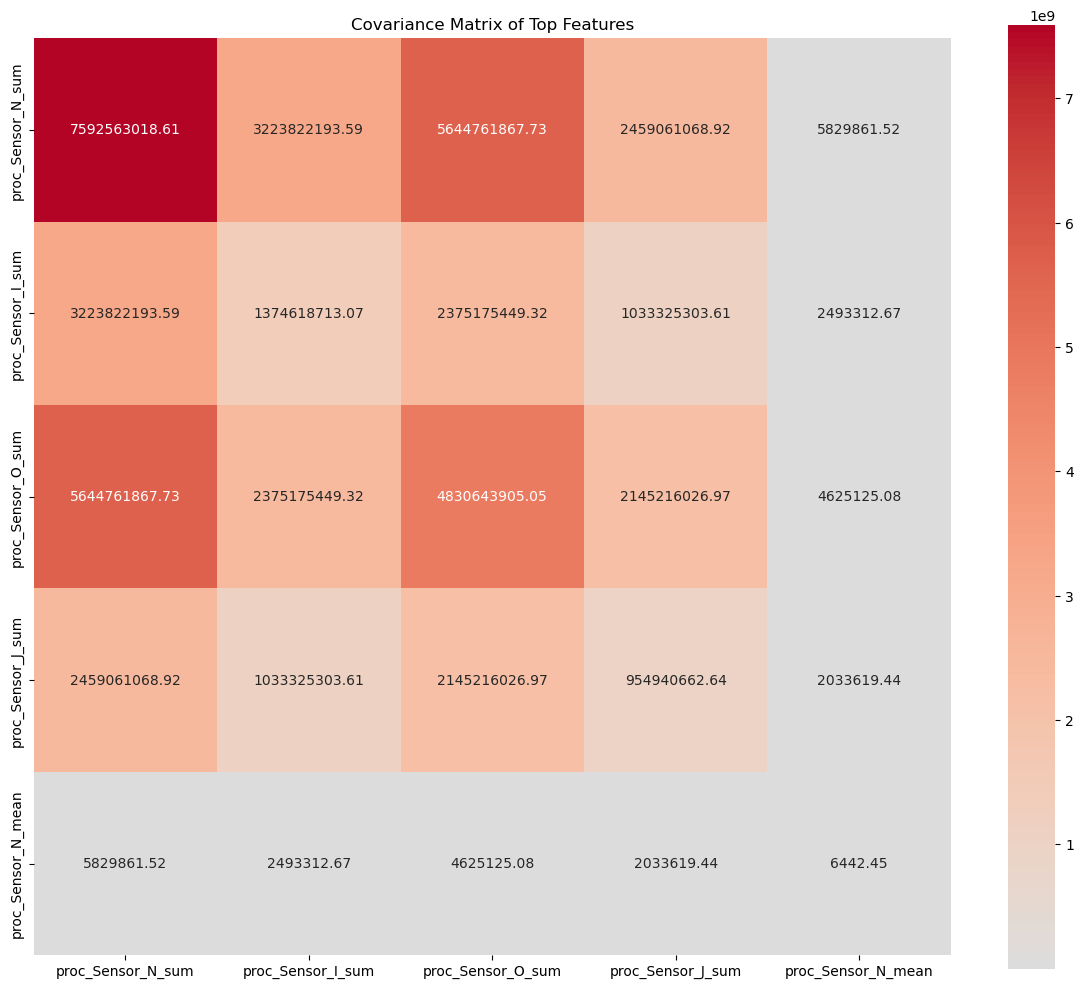

In [52]:
top_n_features = 5  
top_features = top_k_df['features'].head(top_n_features).tolist()

plt.figure(figsize=(12, 10))
cov_matrix = X_selected[top_features].cov()
sns.heatmap(cov_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Covariance Matrix of Top Features')
plt.tight_layout()
plt.savefig('plots/covariance_matrix.png')
plt.show()

## Feature Importance

<Figure size 1200x800 with 0 Axes>

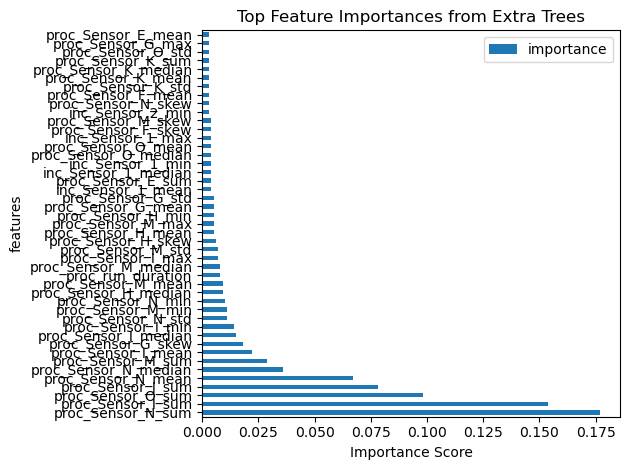

In [44]:
plt.figure(figsize=(12, 8))
top_k_df.plot(kind='barh', x='features', y='importance')
plt.title('Top Feature Importances from Extra Trees')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('plots/feature_importance.png')
plt.show()

## Model Training and Validation: Extra Trees + KMeans Features

In [82]:
# --- Model Training and Validation: Extra Trees + KMeans Features ---
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, early_stopping
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

X_model = X_et_kmeans.copy()
if 'ToolId' in training_data.columns and 'ToolId' not in X_model.columns:
    X_model = pd.concat([X_model, training_data[['ToolId']]], axis=1)
X_model = X_model.loc[:, ~X_model.columns.duplicated()]
X_model.columns = X_model.columns.astype(str)
timedelta_cols = X_model.select_dtypes(include=['timedelta64[ns]', 'timedelta64[ns]']).columns
for col in timedelta_cols:
    X_model[col] = X_model[col].dt.total_seconds()
categorical_features = ['ToolId', 'kmeans_label'] if 'ToolId' in X_model.columns else ['kmeans_label']
numeric_features = [col for col in X_model.columns if col not in categorical_features]
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
preprocessor.fit(X_model)
X_model_encoded = preprocessor.transform(X_model)
indices = np.arange(len(run_ids_final))
X_temp, X_test, y_temp, y_test, idx_temp, idx_test = train_test_split(
    X_model_encoded, y, indices, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(
    X_temp, y_temp, idx_temp, test_size=0.05, random_state=42
)
xgb_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'tree_method': ['hist'],  
    'device': ['cuda']  
}
xgb_search = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=0
)
xgb_search.fit(X_train, y_train.iloc[:, 0])
best_xgb_params = xgb_search.best_params_
best_xgb_params['early_stopping_rounds'] = 20
final_predictions = np.zeros((X_test.shape[0], y.shape[1]))
for point in range(y.shape[1]):
    y_train_point = y_train.iloc[:, point]
    y_val_point = y_val.iloc[:, point]
    xgb_model = XGBRegressor(**best_xgb_params)
    xgb_model.fit(
        X_train, y_train_point,
        eval_set=[(X_val, y_val_point)],
        verbose=False
    )
    xgb_pred = xgb_model.predict(X_test)
    lgb_model = LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8
    )
    lgb_model.fit(
        X_train, y_train_point,
        eval_set=[(X_val, y_val_point)],
        callbacks=[early_stopping(20)]
    )
    lgb_pred = lgb_model.predict(X_test)
    final_predictions[:, point] = 0.6 * xgb_pred + 0.4 * lgb_pred
try:
    rmse = mean_squared_error(y_test, final_predictions, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Final Test RMSE (ExtraTrees+KMeans): {rmse:.5f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.153970
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[219]	valid_0's l2: 0.00110135


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.186768
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[95]	valid_0's l2: 0.00144585


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.407747
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[181]	valid_0's l2: 0.00154517


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.120885
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[80]	valid_0's l2: 0.00125484


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.182091
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.000434463


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.203800
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[110]	valid_0's l2: 0.00138839


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.254352
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[167]	valid_0's l2: 0.0013827


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.179858
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[100]	valid_0's l2: 0.00131365


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.133201
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[142]	valid_0's l2: 0.00124559


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.268161
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[490]	valid_0's l2: 0.00114153


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.274008
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[221]	valid_0's l2: 0.00103992


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.274589
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[468]	valid_0's l2: 0.000988254


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.270573
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[293]	valid_0's l2: 0.000994154


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.215753
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[445]	valid_0's l2: 0.000875795


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.078823
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[113]	valid_0's l2: 0.00171986


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.298480
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[260]	valid_0's l2: 0.00089814


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.350055
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[98]	valid_0's l2: 0.00168405


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.156217
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[131]	valid_0's l2: 0.00142667


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.207421
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[156]	valid_0's l2: 0.00109222


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.202453
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[222]	valid_0's l2: 0.000749463


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.152645
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[105]	valid_0's l2: 0.00109141


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.240571
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[170]	valid_0's l2: 0.0012191


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.348113
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[121]	valid_0's l2: 0.00130208


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.218078
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[201]	valid_0's l2: 0.00099643


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.219710
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[244]	valid_0's l2: 0.000917445


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.243498
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[203]	valid_0's l2: 0.000853792


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.197598
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.000654297


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.172103
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[254]	valid_0's l2: 0.000948218


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.267404
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[368]	valid_0's l2: 0.000936412


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.260627
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[403]	valid_0's l2: 0.000879258


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.240382
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[259]	valid_0's l2: 0.000884559


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.234576
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's l2: 0.000818875


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.216664
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[340]	valid_0's l2: 0.000818493


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.276529
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[290]	valid_0's l2: 0.000990787


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.314610
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[215]	valid_0's l2: 0.00088666


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.272465
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[431]	valid_0's l2: 0.00102952


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.264727
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[444]	valid_0's l2: 0.000987624


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.074130
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[130]	valid_0's l2: 0.00139181


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.224629
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[241]	valid_0's l2: 0.00104983


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.257770
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[142]	valid_0's l2: 0.000930339


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.154261
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[118]	valid_0's l2: 0.00113059


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.226855
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[208]	valid_0's l2: 0.000869051


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.265904
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[282]	valid_0's l2: 0.000980797


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.106261
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[117]	valid_0's l2: 0.00128398


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.235020
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[230]	valid_0's l2: 0.0010114


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.210580
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[302]	valid_0's l2: 0.00107482


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.350583
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[176]	valid_0's l2: 0.00109608


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.243853
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[165]	valid_0's l2: 0.00110955


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.106212
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[105]	valid_0's l2: 0.00128621
Final Test RMSE (ExtraTrees+KMeans): 0.03237


c:\Users\USER\anaconda3\envs\datasci-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Regression Error Characteristic curves 

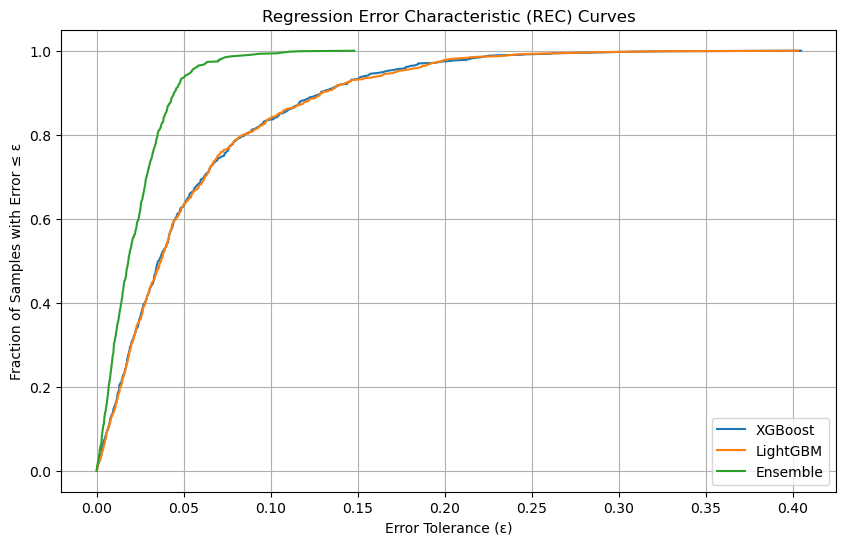

In [83]:

plt.figure(figsize=(10, 6))

predictions = {
    'XGBoost': xgb_pred,
    'LightGBM': lgb_pred,
    'Ensemble': final_predictions[:, 0]  
}

for name, preds in predictions.items():
    abs_errors = np.abs(preds - y_test.iloc[:, 0])  
    sorted_errors = np.sort(abs_errors)
    coverage = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
    plt.plot(sorted_errors, coverage, label=name)

plt.xlabel("Error Tolerance (ε)")
plt.ylabel("Fraction of Samples with Error ≤ ε")
plt.title("Regression Error Characteristic (REC) Curves")
plt.grid(True)
plt.legend()
plt.savefig("plots/rec_curves.png")
plt.show()

## Error Distribution

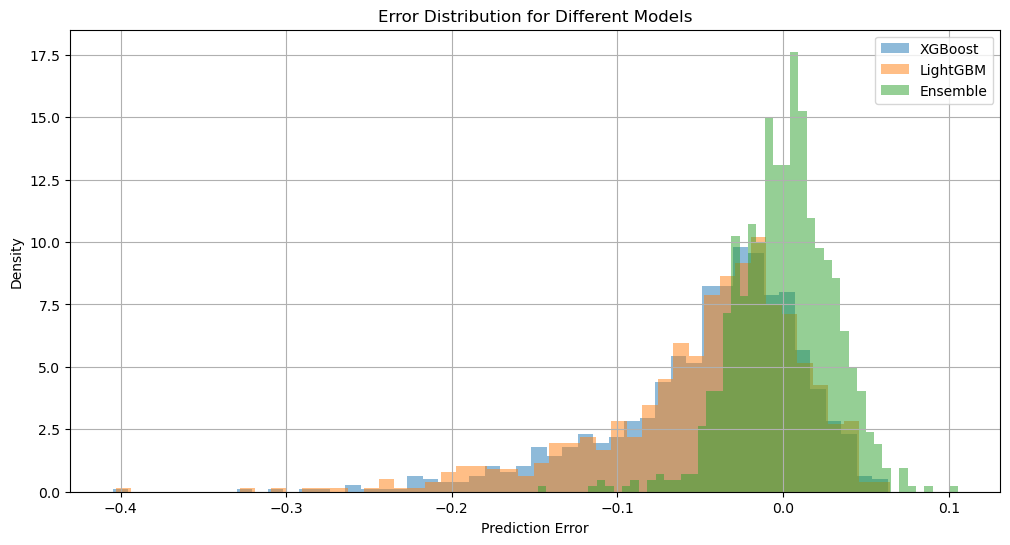

In [84]:
plt.figure(figsize=(12, 6))

errors = {
    'XGBoost': xgb_pred - y_test.iloc[:, 0],
    'LightGBM': lgb_pred - y_test.iloc[:, 0],
    'Ensemble': final_predictions[:, 0] - y_test.iloc[:, 0]
}

for name, error in errors.items():
    plt.hist(error, bins=50, alpha=0.5, label=name, density=True)

plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Error Distribution for Different Models')
plt.legend()
plt.grid(True)
plt.savefig('plots/error_distribution.png')
plt.show()

## Prediction vs Actual

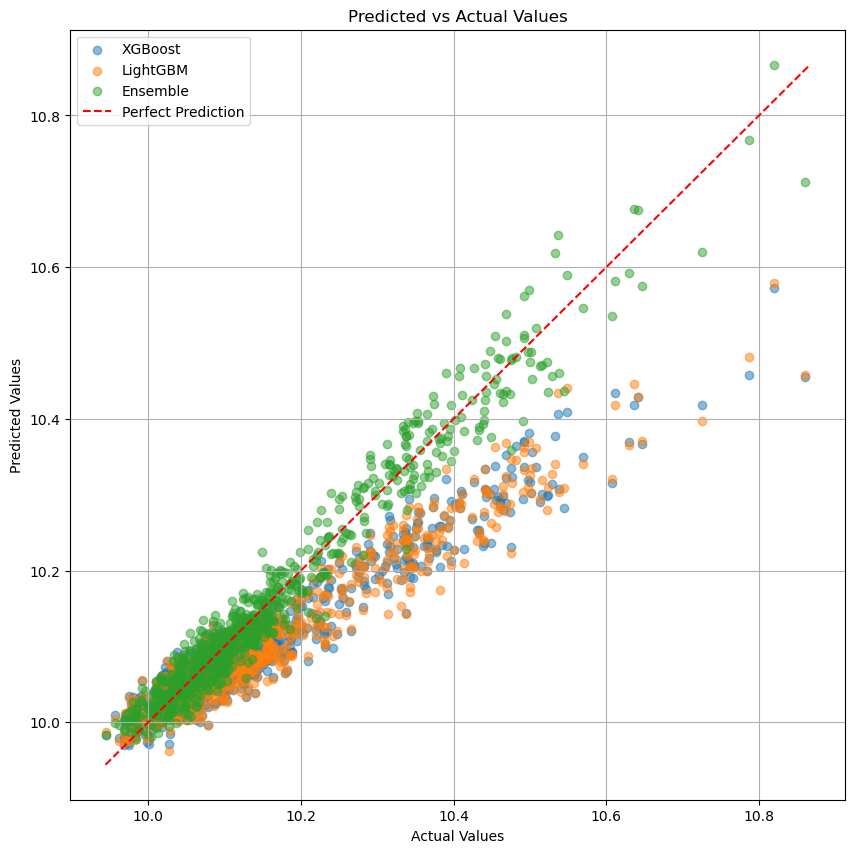

In [85]:
plt.figure(figsize=(10, 10))

for name, preds in predictions.items():
    plt.scatter(y_test.iloc[:, 0], preds, alpha=0.5, label=name)

min_val = min(y_test.iloc[:, 0].min(), min(preds.min() for preds in predictions.values()))
max_val = max(y_test.iloc[:, 0].max(), max(preds.max() for preds in predictions.values()))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig('plots/prediction_vs_actual.png')
plt.show()

In [86]:
# Save submission file
submission_df = pd.DataFrame(final_predictions, columns=target_columns)
submission_df['RunId'] = run_ids_final.iloc[idx_test].values
submission_df = submission_df[submission_df['RunId'].notnull()]
submission_df = submission_df.drop_duplicates(subset=['RunId'])
submission_df = submission_df.sort_values(by='RunId')
submission_df.to_csv('submission.csv', index=False)

## 4. Submission 

In [87]:
df = pd.read_parquet('metrology_data.parquet')

test_run_data = pd.read_parquet('test/run_data.parquet')
test_incoming_data = pd.read_parquet('test/incoming_run_data.parquet')



test_run_data.rename(columns={'Tool ID': 'ToolId',
                       'Run Start Time': 'RunStartTime',
                       'Run End Time': 'RunEndTime',
                       'Run ID': 'RunId',
                       'Process Step': 'ProcessStep',
                       'Consumable Life': 'ConsumableLife',
                       'Step ID': 'StepId',
                       'Time Stamp': 'TimeStamp',
                       'Sensor Name': 'SensorName',
                       'Sensor Value': 'SensorValue'}, inplace=True)

test_incoming_data.rename(columns={'Tool ID': 'ToolId', 
                             'Run Start Time': 'RunStartTime',
                             'Run End Time': 'RunEndTime',
                             'Run ID': 'RunId',
                             'Process Step': 'ProcessStep',
                             'Step ID': 'StepId',
                             'Time Stamp': 'TimeStamp',
                             'Sensor Name': 'SensorName',
                             'Sensor Value': 'SensorValue'}, inplace=True)


In [88]:
features_run = create_agg_features(test_run_data, prefix='proc_')
features_incoming = create_agg_features(test_incoming_data, prefix='inc_')


static_features = test_run_data[['RunId', 'ToolId', 'ConsumableLife']].drop_duplicates(subset=['RunId'])
if static_features['RunId'].duplicated().any():
     static_features = static_features.groupby('RunId').first() 
else:
     static_features = static_features.set_index('RunId')


# merge
final_test_features = static_features.join(features_run.set_index('RunId'), on='RunId')

final_test_features = final_test_features.join(features_incoming.set_index('RunId'), on='RunId')


aggregated features with prefix: proc_
aggregated features with prefix: inc_


In [89]:

final_test_features = final_test_features.reset_index()

feature_columns = [col for col in final_test_features.columns if col != 'RunId']
X_test = final_test_features[feature_columns].drop('ToolId', axis=1)


X_test['inc_run_duration'] = X_test['inc_run_duration'].apply(lambda x: x.total_seconds())
X_test['proc_run_duration'] = X_test['proc_run_duration'].apply(lambda x: x.total_seconds())


In [90]:
display(X_test)

,ConsumableLife,proc_Sensor_A_mean,proc_Sensor_A_std,proc_Sensor_A_min,proc_Sensor_A_max,proc_Sensor_A_median,proc_Sensor_A_skew,proc_Sensor_A_sum,proc_Sensor_B_mean,proc_Sensor_B_std,...,inc_Sensor_8_skew,inc_Sensor_8_sum,inc_Sensor_9_mean,inc_Sensor_9_std,inc_Sensor_9_min,inc_Sensor_9_max,inc_Sensor_9_median,inc_Sensor_9_skew,inc_Sensor_9_sum,inc_run_duration
0,115.641464,0.003904,0.057714,-0.127762,0.119095,0.004508,-0.140023,2.646686,359.911865,9995.263595,...,-0.105423,49082.292969,108.245247,94.246468,-3.052058,209.287170,127.383598,-0.111523,49468.078125,456.000000
1,351.287750,0.000440,0.058004,-0.125030,0.121876,-0.000970,0.011642,0.292860,8.637903,810.201341,...,0.122489,41759.886719,94.637772,92.466835,-2.991898,205.638855,91.067322,0.117985,41451.343750,436.999999
2,93.483879,-0.002633,0.057128,-0.133910,0.109139,-0.004423,-0.023315,-1.579871,62.498302,2139.571727,...,-0.127889,49318.019531,108.746887,93.457443,-3.003605,208.144714,131.696899,-0.133575,51763.519531,475.000000
3,215.626404,0.002636,0.056736,-0.115691,0.114624,0.001467,-0.021877,1.618248,-35.206646,1190.712844,...,0.014318,49184.980469,98.020378,91.029045,-3.104290,201.455063,98.026901,0.009400,49500.289062,504.000000
4,158.428711,-0.000266,0.057775,-0.120110,0.117478,-0.003783,0.064066,-0.185718,-55.992004,624.158940,...,-0.049839,47801.468750,100.580437,90.001648,-3.038958,199.748672,98.747223,-0.055819,45663.519531,453.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,396.446198,-0.003801,0.058594,-0.099911,0.099507,-0.009370,0.129697,-2.771024,-12.796025,536.128392,...,0.096665,47498.101562,92.510719,89.691216,-2.981722,201.445480,88.232796,0.142304,45237.742188,487.999999
856,157.337097,0.000113,0.058669,-0.099700,0.099857,-0.001850,0.026395,0.077686,0.941636,555.343886,...,-0.012357,45245.656250,99.664261,91.237831,-2.940707,204.752747,98.017349,0.031160,45945.222656,460.000000
857,389.172363,0.000942,0.058282,-0.099753,0.098921,0.004241,-0.050438,0.649977,-29.435598,1470.625752,...,0.078399,49701.761719,95.795799,92.091469,-3.207752,206.481293,92.322365,0.122825,49909.613281,520.000000
858,223.075592,-0.001155,0.059520,-0.099956,0.099158,-0.004389,0.060049,-0.715989,-705.293457,16020.869457,...,0.100839,45459.726562,93.577591,90.882271,-2.731769,204.683578,87.288605,0.144534,44449.355469,474.000000


In [91]:

required_vars = [
    'extra_trees_features', 'scaler', 'kmeans', 'cluster_distance_cols',
    'numeric_features', 'categorical_features', 'preprocessor',
    'X_train', 'y_train', 'X_val', 'y_val', 'best_xgb_params'
]

for var in required_vars:
    if var not in locals():
        print(f"Missing variable: {var}")

In [92]:
# Feature engineering for test data
features_run = create_agg_features(test_run_data, prefix='proc_')
features_incoming = create_agg_features(test_incoming_data, prefix='inc_')

static_features = test_run_data[['RunId', 'ToolId', 'ConsumableLife']].drop_duplicates(subset=['RunId'])
if static_features['RunId'].duplicated().any():
     static_features = static_features.groupby('RunId').first() 
else:
     static_features = static_features.set_index('RunId')

final_test_features = static_features.join(features_run.set_index('RunId'), on='RunId')
final_test_features = final_test_features.join(features_incoming.set_index('RunId'), on='RunId')
final_test_features = final_test_features.reset_index()

feature_columns = [col for col in final_test_features.columns if col != 'RunId']
X_test_final = final_test_features[feature_columns].drop('ToolId', axis=1)

# Convert timedelta columns to seconds
if 'inc_run_duration' in X_test_final.columns:
    X_test_final['inc_run_duration'] = X_test_final['inc_run_duration'].apply(lambda x: x.total_seconds())
if 'proc_run_duration' in X_test_final.columns:
    X_test_final['proc_run_duration'] = X_test_final['proc_run_duration'].apply(lambda x: x.total_seconds())

# Select features as used in training
X_test_selected = X_test_final[extra_trees_features] if 'extra_trees_features' in locals() else X_test_final

# KMeans features for test set
X_test_scaled = scaler.transform(X_test_selected)
test_cluster_labels = kmeans.predict(X_test_scaled)
test_cluster_distances = kmeans.transform(X_test_scaled)

X_test_selected = X_test_selected.copy()
for i, col in enumerate(cluster_distance_cols):
    X_test_selected.loc[:, col] = test_cluster_distances[:, i]
X_test_selected.loc[:, 'kmeans_label'] = test_cluster_labels

X_test_selected = X_test_selected.loc[:, ~X_test_selected.columns.duplicated()]
X_test_selected.columns = X_test_selected.columns.astype(str)
timedelta_cols = X_test_selected.select_dtypes(include=['timedelta64[ns]', 'timedelta64[ns]']).columns
for col in timedelta_cols:
    X_test_selected.loc[:, col] = X_test_selected[col].dt.total_seconds()

if 'ToolId' in final_test_features.columns and 'ToolId' not in X_test_selected.columns:
    X_test_selected = pd.concat([X_test_selected, final_test_features[['ToolId']]], axis=1)

feature_names = numeric_features + [f"{col}_{val}" for col, vals in 
    zip(categorical_features, preprocessor.named_transformers_['cat'].categories_) 
    for val in vals]

X_test_encoded = pd.DataFrame(
    preprocessor.transform(X_test_selected),
    columns=feature_names,
    index=X_test_selected.index
)

final_test_predictions = np.zeros((X_test_encoded.shape[0], y.shape[1]))
for point in range(y.shape[1]):
    xgb_model = XGBRegressor(
        **{k: v for k, v in best_xgb_params.items() if k not in ['tree_method', 'device']},
        tree_method='hist',
        device='cuda'
    )
    xgb_model.fit(X_train, y_train.iloc[:, point], eval_set=[(X_val, y_val.iloc[:, point])], verbose=False)
    xgb_pred = xgb_model.predict(X_test_encoded)
    
    lgb_model = LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        force_col_wise=True
    )
    lgb_model.fit(X_train, y_train.iloc[:, point], eval_set=[(X_val, y_val.iloc[:, point])], callbacks=[early_stopping(20)])
    lgb_pred = lgb_model.predict(X_test_encoded)
    final_test_predictions[:, point] = 0.6 * xgb_pred + 0.4 * lgb_pred

# Build submission DataFrame in the required format
out = final_test_predictions  
sample_predictions = pd.DataFrame(out).unstack().reset_index(name='Measurement').rename(columns={'level_0': 'Point Index', 'level_1': 'Run ID'})
sample_predictions['Point Index'] = sample_predictions['Point Index'].apply(lambda x: int(x))

sample_data = pd.read_parquet('metrology_data.parquet').drop(columns=['Measurement'])
sample_predictions['Run ID'] = sample_data['Run ID']

# Create the final submission DataFrame
SUBMISSION_DF = pd.merge(
    left=sample_data, 
    right=sample_predictions,
    left_on=['Run ID', 'Point Index'],
    right_on=['Run ID', 'Point Index'],
)

SUBMISSION_DF.to_csv('submission.csv', index=False)

print('Submission file submission.csv created successfully.')

aggregated features with prefix: proc_
aggregated features with prefix: inc_
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.153970
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[219]	valid_0's l2: 0.00110135
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.186768
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[95]	valid_0's l2: 0.00144585
[LightGBM] [Info] Total Bins 12862
[LightGBM] [Info] Number of data points in the train set: 3146, number of used features: 75
[LightGBM] [Info] Start training from score 10.407747
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[181]	valid_0's l2: 0.00154517


## Submission file here

In [93]:
SUBMISSION_DF

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement
0,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,25,5,3.061224,-119.387755,0,10.099899
1,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,25,5,3.061224,-119.387755,0,10.054409
2,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,25,5,3.061224,-119.387755,0,10.081690
3,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,25,5,3.061224,-119.387755,0,10.098177
4,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,25,5,3.061224,-119.387755,0,10.052139
...,...,...,...,...,...,...,...,...,...
42135,ef918e33-410b-5687-bb0c-ca086e995572,2024-01-04 01:24:50,2024-01-04 01:37:25,1,29,-143.877551,27.551020,48,10.242484
42136,ef918e33-410b-5687-bb0c-ca086e995572,2024-01-04 01:24:50,2024-01-04 01:37:25,1,29,-143.877551,27.551020,48,10.064295
42137,ef918e33-410b-5687-bb0c-ca086e995572,2024-01-04 01:24:50,2024-01-04 01:37:25,1,29,-143.877551,27.551020,48,10.046998
42138,ef918e33-410b-5687-bb0c-ca086e995572,2024-01-04 01:24:50,2024-01-04 01:37:25,1,29,-143.877551,27.551020,48,10.126752
